# KG Generator Tool

## Let's get started by importing relevant libraries

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm

import pybel
from pybel.io.jupyter import to_jupyter
from utils import *
from kg_gen_2 import *

from IPython.display import Markdown, display

## Please execute following cells

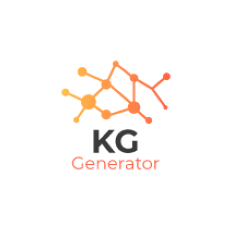

<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need some inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: lung cancer


index,id,name
0,MONDO_0008903,lung cancer
1,EFO_0001071,lung carcinoma
2,EFO_0022194,EGFR-related lung cancer
3,EFO_0003060,non-small cell lung carcinoma
4,EFO_0000702,small cell lung carcinoma
5,EFO_0006953,family history of lung cancer
6,EFO_0004244,interstitial lung disease
7,EFO_0000708,squamous cell lung carcinoma
8,MONDO_0021117,lung neoplasm
9,EFO_0000571,lung adenocarcinoma


<span style='color:None'>**Here you go! Hopefully your disease of interest is in the list. If so, let's get started.**</span>

Please enter the index value of your disease of interest. Input: 0
Please enter the clinical trial phase of chemicals which should be identified by the workflow. Use a number between 1 (early phase) and 4 (FDA approved). For example, if you use 3, the KG will fetch chemicals that are in phase 3. Also, remember that lower the input value, higher will be the number of identified chemicals and therefore the running time of workflow also increases.


Your desired clinical trial phase: 4


Please provide a name for you KG. Input: lung cancer


We have identified 9770 proteins (Swiss-Prot) associated with the disease. Following is a histogram that shows distribution of proteins based on scores provided by OpenTargets. The scores are influenced by various factors such as genetic associations, expression, mutations, known pathways, targeting drugs and so on.

Displaying top 20 genes


Protein,ENSG,UniProt,Source,Score
EGFR,ENSG00000146648,P00533,uniprot_swissprot,0.903833
KRAS,ENSG00000133703,P01116,uniprot_swissprot,0.838998
ERBB2,ENSG00000141736,P04626,uniprot_swissprot,0.836005
BRAF,ENSG00000157764,P15056,uniprot_swissprot,0.825572
ALK,ENSG00000171094,Q9UM73,uniprot_swissprot,0.825162
TP53,ENSG00000141510,P04637,uniprot_swissprot,0.822664
MET,ENSG00000105976,P08581,uniprot_swissprot,0.813641
ERBB4,ENSG00000178568,Q15303,uniprot_swissprot,0.802344
RB1,ENSG00000139687,P06400,uniprot_swissprot,0.793669
KDR,ENSG00000128052,P35968,uniprot_swissprot,0.786661


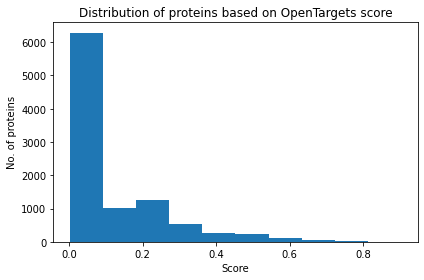



We recommend taking a threshold above 0.3 to exclude loosely associated proteins. 
Please enter your desired threshold: 0.6


Alright, we are good to go now. Your KG is now being generated! Sit back and relax!!

 Total no. of proteins:  104

     Protein             ENSG UniProt             Source     Score
0      EGFR  ENSG00000146648  P00533  uniprot_swissprot  0.903833
1      KRAS  ENSG00000133703  P01116  uniprot_swissprot  0.838998
2     ERBB2  ENSG00000141736  P04626  uniprot_swissprot  0.836005
3      BRAF  ENSG00000157764  P15056  uniprot_swissprot  0.825572
4       ALK  ENSG00000171094  Q9UM73  uniprot_swissprot  0.825162
..      ...              ...     ...                ...       ...
99    STAT3  ENSG00000168610  P40763  uniprot_swissprot  0.602680
100   VEGFA  ENSG00000112715  P15692  uniprot_swissprot  0.602224
101   POLD2  ENSG00000106628  P49005  uniprot_swissprot  0.601388
102   POLE3  ENSG00000148229  Q9NRF9  uniprot_swissprot  0.601296
103   POLA1  ENSG00000101868 

KeyError: 'phase'

In [16]:
kg = createKG()

In [ ]:
kg.summarize

In [ ]:
to_jupyter(kg)

In [ ]:
KG_namespace_plot(kg)